In [2]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Linear regression using Gradient descent](#linreg)<br>
[Linear regression using Newton Method](#newton)


#### Gradient Descent

- It is a first order method for solving an optimization problem
- Gradient Descent with a step size $t_k$ at the $k^{th}$ iteration
    - $ x ^ {k+1} = x^{k} - t_k \nabla f(x^k)$
    - Here $\nabla f(x^k)$ is the gradient at point $x^k$
- This method is commonly used in Deep learning and machine learning to minimize cost functions
- For convex optimization it gives global optimum under failry general conditions
- for non-convex optimization, it may achieve a local optimum

<b> In relation to Linear regression we are trying to minimize the squared errors </b>
- $min f(b) = || y-Xb ||^{2}$
    - $X \in R^{n\times(p+1)}$
- $\nabla f(b) = 2X^{T}(Xb-y)$
- $b^{k+1} = b^{k} - 2t_{k} X^{T}(Xb^{k}-y)$

<b> Some of the stopping criterion could be the following </b>
- $||\nabla f(x)||_{2}$ is sufficiently small
- $||x^{k+1}-x^{k}||_{2}$ or $|f(x^{k+1})-f(x^{k})|$ is small

<b> Learning Rate in a gradient Descent</b>
<br>![Alt Text](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/gradient-descent-learning-rate.png)</br>

[Link for More on hyperparameters](https://developers.google.com/machine-learning/crash-course/linear-regression/hyperparameters)

Some types of Gradient Descent
- Batch Gradient Descent
- Stochastic Gradient Descent
- Mini batch Gradient Descent


[Link to diff between batch and SGD](https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/#:~:text=background%2Dcolor%3A%20%23ffffff%3B%20%7D-,Batch%20Gradient%20Descent,can%20help%20reduce%20overfitting%20by%20updating%20the%20model%20parameters%20more%20frequently.,-Comment)

<a id = 'linreg'></a>
<b> Batch vs Stochastic vs Mini Batch </b>

In [2]:
# batch gradient descent

def batch_gradient_descent(X, y, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
    """
    Implement batch gradient descent for linear regression.
    
    Returns:
    numpy.ndarray: Optimal parameters
    list: History of costs for plotting convergence
    """
    # Add bias term to X
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    
    # Initialize parameters (weights and bias)
    theta = np.zeros(n + 1)
    
    # Lists to store cost history
    cost_history = []
    
    for iteration in range(max_iterations):
        # Calculate predictions
        y_pred = X_b.dot(theta)
        
        # Calculate gradients
        gradients = (2/m) * X_b.T.dot(y_pred - y)
        
        # Store previous parameters for convergence check
        theta_prev = theta.copy()
        
        # Update parameters
        theta = theta - learning_rate * gradients
        
        # Calculate cost (MSE)
        cost = np.mean((y_pred - y) ** 2)
        cost_history.append(cost)
        
        # Check for convergence
        if np.all(np.abs(theta - theta_prev) < tolerance):
            print(f"Converged after {iteration + 1} iterations!")
            break
            
        if iteration == max_iterations - 1:
            print("Maximum iterations reached!")
    
    return theta, cost_history

# Example usage
def generate_sample_data(n_samples=100, noise=0.1):
    """Generate sample data for testing"""
    X = 2 * np.random.rand(n_samples, 1)
    y = 4 + 3 * X + noise * np.random.randn(n_samples, 1)
    return X, y.ravel()

# Generate sample data
X, y = generate_sample_data()

# Train the model
theta, cost_history = batch_gradient_descent(X, y, 0.02)

# Print results
print("\nFinal parameters:")
print(f"Bias (theta_0): {theta[0]:.4f}")
print(f"Weight (theta_1): {theta[1]:.4f}")

Maximum iterations reached!

Final parameters:
Bias (theta_0): 3.9676
Weight (theta_1): 3.0300


The (1/m) scaling factor in the gradient serves two important purposes:
- It normalizes the gradient by the number of examples, preventing larger datasets from causing larger gradient steps
- It ensures the learning rate doesn't need to be adjusted based on the dataset size

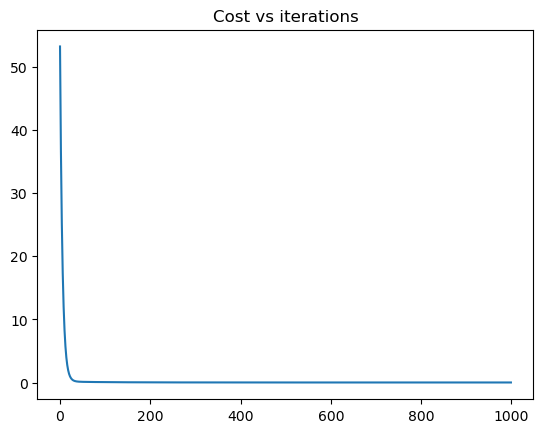

In [3]:
plt.plot(cost_history)
plt.title("Cost vs iterations")
plt.show()

In [4]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, max_epochs=100, tolerance=1e-6):
    """
    Implement stochastic gradient descent for linear regression.
    
    Returns:
    numpy.ndarray: Optimal parameters (weights and bias)
    list: History of costs for plotting convergence
    """
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    
    theta = np.zeros(n + 1)
    
    # Lists to store cost history
    cost_history = []
    
    # Main training loop over epochs
    for epoch in range(max_epochs):
        theta_prev = theta.copy()
        
        # Create random ordering of examples
        indices = np.random.permutation(m)
        
        # Loop through each training example
        for i in indices:
            # Get single example and its target
            xi = X_b[i:i+1]
            yi = y[i]
            
            # Make prediction
            y_pred = xi.dot(theta)
            
            # Calculate gradient for this example
            # Note: No need for 2/m here as m=1 for each update
            gradient = 2 * xi.T.dot(y_pred - yi)
            
            # Update parameters
            theta = theta - learning_rate * gradient
        
        # Calculate cost over all examples at end of epoch
        y_pred_all = X_b.dot(theta)
        cost = np.mean((y_pred_all - y) ** 2)
        cost_history.append(cost)
        
        # Check for convergence using parameter change
        if np.all(np.abs(theta - theta_prev) < tolerance):
            print(f"Converged after {epoch + 1} epochs!")
            break
            
        if epoch == max_epochs - 1:
            print("Maximum epochs reached!")
    
    return theta, cost_history


In [5]:
X, y = generate_sample_data()

# Train the model
theta, cost_history = stochastic_gradient_descent(X, y, 0.02)

# Print results
print("\nFinal parameters:")
print(f"Bias (theta_0): {theta[0]:.4f}")
print(f"Weight (theta_1): {theta[1]:.4f}")

Maximum epochs reached!

Final parameters:
Bias (theta_0): 3.9890
Weight (theta_1): 3.0132


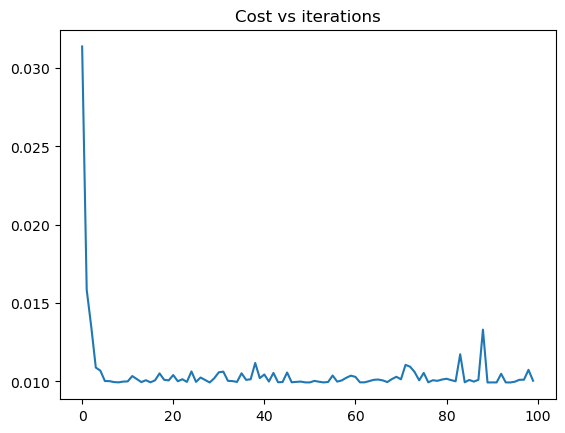

In [6]:
plt.plot(cost_history)
plt.title("Cost vs iterations")
plt.show()

In [7]:
# Mini Batch Gradient Descent
def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, max_epochs=100, tolerance=1e-6):
    """
    Implement mini-batch stochastic gradient descent for linear regression.
    """
    # Add bias term to X
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    
    # Initialize parameters (weights and bias)
    theta = np.zeros(n + 1)
    
    # Lists to store cost history
    cost_history = []
    
    # Main training loop over epochs
    for epoch in range(max_epochs):
        theta_prev = theta.copy()
        
        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X_b[indices]
        y_shuffled = y[indices]
        
        # Process mini-batches
        for i in range(0, m, batch_size):
            # Get mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            # Calculate predictions for this batch
            y_pred = X_batch.dot(theta)
            
            # Calculate gradients using the current batch
            # Note: We divide by batch_size (not m) since we're using a mini-batch
            gradients = (2/len(X_batch)) * X_batch.T.dot(y_pred - y_batch)
            
            # Update parameters
            theta = theta - learning_rate * gradients
        
        # Calculate cost over all examples at end of epoch
        y_pred_all = X_b.dot(theta)
        cost = np.mean((y_pred_all - y) ** 2)
        cost_history.append(cost)
        
        # Check for convergence
        if np.all(np.abs(theta - theta_prev) < tolerance):
            print(f"Converged after {epoch + 1} epochs!")
            break
            
        if epoch == max_epochs - 1:
            print("Maximum epochs reached!")
    
    return theta, cost_history

In [8]:
# Train the model
theta, cost_history = mini_batch_gradient_descent(X, y, batch_size=40, max_epochs=1000)

# Print results
print("\nFinal parameters:")
print(f"Bias (theta_0): {theta[0]:.4f}")
print(f"Weight (theta_1): {theta[1]:.4f}")

Maximum epochs reached!

Final parameters:
Bias (theta_0): 3.9855
Weight (theta_1): 3.0056


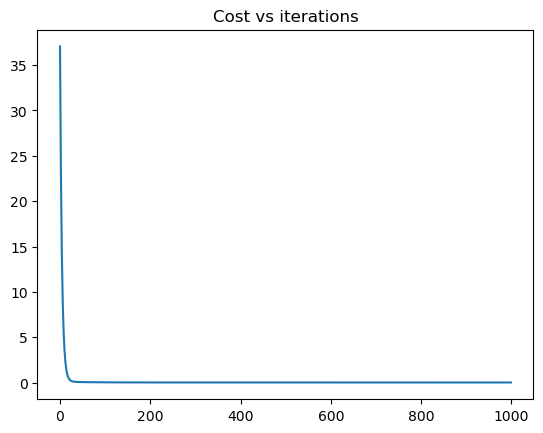

In [9]:
plt.plot(cost_history)
plt.title("Cost vs iterations")
plt.show()

<a id = 'newton'></a>
#### Newton's method

- It is a second order method for solving an optimization problem
- Newton Method with a step size $t_k$ at the $k^{th}$ iteration
    - $ x ^ {k+1} = x^{k} - t_k H(f(x^k))^{-1} \nabla f(x^k)$
    - Here $\nabla f(x^k)$ is the gradient at point $x^k$
    - $H(f(x^k))$ is the Hessian Matrix
- This method is commonly used to minimize cost functions
- For convex optimization it gives global optimum under failry general conditions
- for non-convex optimization, it may achieve a local optimum

<b> In relation to Linear regression we are trying to minimize the squared errors </b>
- $min f(b) = || y-Xb ||^{2}$
    - $X \in R^{n\times(p+1)}$
- $\nabla f(b) = 2X^{T}(Xb-y)$
- $ H(f(b)) = 2X^{T}X$
- $b^{k+1} = b^{k} - t_{k} (X^{T}X)^{-1} X^{T}(Xb^{k}-y)$

In [16]:

def newton_method_linear_regression(X, y, max_iter=100, tol=1e-6, step_size=1.0):
    """
    Implement Newton's method for linear regression with a step size parameter.
    
    """
    n_samples, n_features = X.shape
    
    # Add bias term
    X_with_bias = np.c_[np.ones(n_samples), X]
    n_features += 1
    
    # Initialize parameters
    beta = np.zeros(n_features)
    loss_history = []
    
    # Precompute Hessian (constant for linear regression)
    # For MSE, the Hessian is (1/n) * X^T X
    hessian = (1/n_samples) * X_with_bias.T @ X_with_bias
    
    # Compute the inverse of Hessian once
    try:
        hessian_inv = np.linalg.inv(hessian)
    except np.linalg.LinAlgError:
        # If Hessian is singular, use pseudo-inverse
        hessian_inv = np.linalg.pinv(hessian)
    
    for i in range(max_iter):
        # Compute predictions
        y_pred = X_with_bias @ beta
        
        # Compute error
        error = y - y_pred
        
        # Compute loss (MSE = mean of squared errors)
        mse = (1/(2*n_samples)) * np.sum(error**2)
        loss_history.append(mse)
        
        # Compute gradient for MSE: -(1/n) * X^T * (y - X*beta)
        gradient = -(1/n_samples) * X_with_bias.T @ error
        
        # Newton update with step size
        update = step_size * hessian_inv @ gradient
        beta = beta - update
        
        # Check convergence
        if np.linalg.norm(update) < tol:
            print(f"Converged after {i+1} iterations")
            break
    
    return beta, loss_history


Converged after 63 iterations
Converged after 41 iterations
Converged after 30 iterations
Newton's Method results:
Step size = 0.1: β = [3.9919, 2.9960], iterations = 100
Step size = 0.2: β = [3.9920, 2.9961], iterations = 63
Step size = 0.3: β = [3.9920, 2.9961], iterations = 41
Step size = 0.4: β = [3.9920, 2.9961], iterations = 30


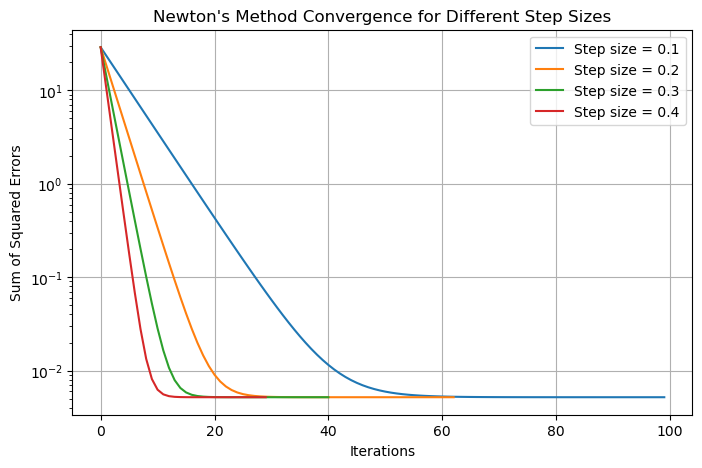

In [19]:
# Generate synthetic data
X, y = generate_sample_data()

# Run Newton's method with different step sizes
step_sizes = [0.1, 0.2, 0.3, 0.4]
results = {}

for step in step_sizes:
    beta, loss_history = newton_method_linear_regression(X, y, step_size=step)
    results[step] = {
        'beta': beta,
        'loss_history': loss_history
    }

# Plot loss history for different step sizes
plt.figure(figsize=(8, 5))
for step, result in results.items():
    plt.plot(result['loss_history'], label=f'Step size = {step}')
plt.xlabel('Iterations')
plt.ylabel('Sum of Squared Errors')
plt.title("Newton's Method Convergence for Different Step Sizes")
plt.legend()
plt.yscale('log')
plt.grid(True)

# Compare with closed-form solution
X_with_bias = np.c_[np.ones(X.shape[0]), X]
beta_closed_form = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y

print("Newton's Method results:")
for step, result in results.items():
    print(f"Step size = {step}: β = [{result['beta'][0]:.4f}, {result['beta'][1]:.4f}], iterations = {len(result['loss_history'])}")

plt.show()